<a href="https://colab.research.google.com/github/zeelShah-12/AI-powered-Average-Calculator-with-Insights/blob/main/House_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Dataset & Basic EDA

In [1]:
# Step 1: Install Required Libraries (if not already installed)
!pip install seaborn xgboost

# Step 2: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Step 3: Load Dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Step 4: Quick Look at Data
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Basic Data Exploration

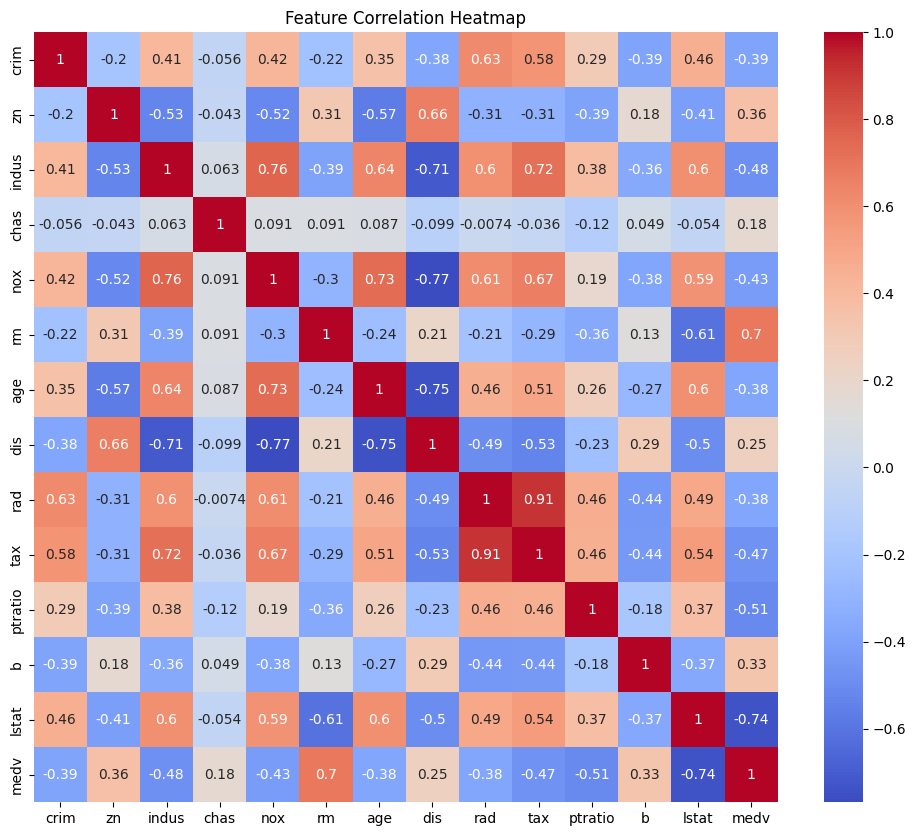

In [2]:
# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Feature Selection & Train/Test Split


In [3]:
# Step 1: Define features and target
X = df.drop('medv', axis=1)  # 'medv' is the target variable (median home value)
y = df['medv']

# Step 2: Split data (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (404, 13)
Test set: (102, 13)


Train First Model – Linear Regression


In [4]:
# Step 1: Train Linear Regression Model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 2: Predict on Test Set
y_pred = lr_model.predict(X_test)

# Step 3: Evaluate Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


Linear Regression Performance:
MAE:  3.19
MSE:  24.29
RMSE: 4.93
R²:   0.67


Visualize Predictions

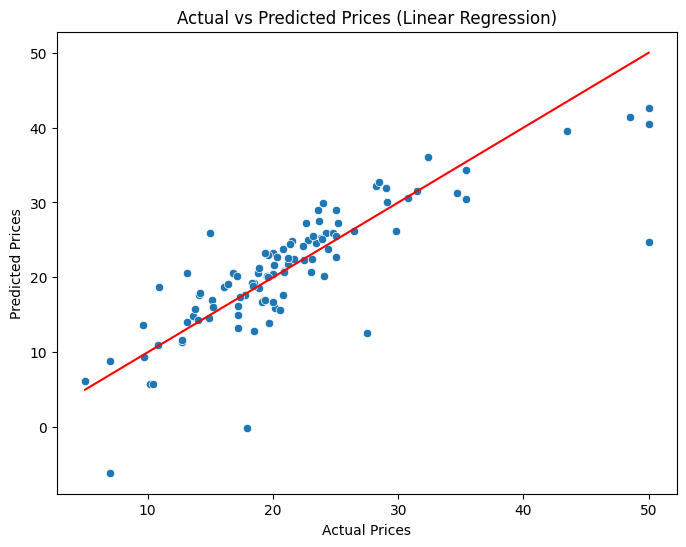

In [5]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # identity line
plt.show()


Ridge Regression

In [6]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Evaluation
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression:")
print(f"MAE:  {ridge_mae:.2f}")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"R²:   {ridge_r2:.2f}")


Ridge Regression:
MAE:  3.13
RMSE: 4.95
R²:   0.67


Random Forest Regressor

In [7]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluation
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regressor:")
print(f"MAE:  {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R²:   {rf_r2:.2f}")


Random Forest Regressor:
MAE:  2.04
RMSE: 2.81
R²:   0.89


XGBoost Regressor

In [8]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluation
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGBoost Regressor:")
print(f"MAE:  {xgb_mae:.2f}")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R²:   {xgb_r2:.2f}")


XGBoost Regressor:
MAE:  1.86
RMSE: 2.63
R²:   0.91


Final Step: Compare All Models

In [9]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mae, ridge_mae, rf_mae, xgb_mae],
    'RMSE': [rmse, ridge_rmse, rf_rmse, xgb_rmse],
    'R² Score': [r2, ridge_r2, rf_r2, xgb_r2]
})

results.sort_values(by='RMSE')


,Model,MAE,RMSE,R² Score
3,XGBoost,1.856844,2.633658,0.905417
2,Random Forest,2.039539,2.810963,0.892253
0,Linear Regression,3.189092,4.928602,0.668759
1,Ridge Regression,3.132947,4.947443,0.666222
